# NEUS 642 - Week 6 Homework

Time for a mini analysis project!

Note that the `data` folder contains additional files than the ones we studied in class. Each file starts with an id (e.g., eno052d-a1), indicating a distinct neuron. Note also that there are pairs of files, one `pupil` and one `spikes`, for each neuron. (In practice these data were all collected simultaneously and the pupil traces are identical for each neuron here, but let's ignore that for now).

Your job: test each cell in this dataset for signficant effects of pupil on spontaneous and evoked firing rate.

## Lecture recap

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
cellid = 'eno052d-a1'
spikefn=f'data/{cellid}_spikes.csv'
pupilfn=f'data/{cellid}_pupil.csv'
print('loading', spikefn, ',', pupilfn)
spikes = np.loadtxt(spikefn, delimiter=",")
pupil = np.loadtxt(pupilfn, delimiter=",")
fs = 10

loading data/eno052d-a1_spikes.csv , data/eno052d-a1_pupil.csv


In [10]:
mean_pupil_per_trial = np.mean(pupil, axis=0)
pupil_median = np.median(mean_pupil_per_trial)
pre_stimulus_bins = int(2 * fs)
post_stimulus_bins = int(0.5 * fs)
response = spikes[pre_stimulus_bins:-post_stimulus_bins,:].mean(axis=0) * fs
spont = spikes[:pre_stimulus_bins,:].mean(axis=0) * fs

small_trials = (mean_pupil_per_trial<=pupil_median)
large_trials = (mean_pupil_per_trial>pupil_median)

In [6]:
def my_permutation_test(a,b,N=100):
    """
    use permutation to test whether the means of a and b are significantly different.
    inputs:
       a, b: 1-D distributions of data
       N: number of permutations
    outputs:
       p: p-value, how likely the absolute value of the mean difference occured by chance
    """
    # first, compute the shuffled mean differences
    shuffled_distribution = np.zeros(N)
    for i in range(N):
        all_data = np.append(a, b)
        s = np.random.permutation(all_data)
        a_shuffled = s[:len(a)]
        b_shuffled = s[len(a):]
        shuffled_distribution[i] = np.mean(a_shuffled) - np.mean(b_shuffled)
    
    # now compute p
    effective_distribution = np.append(shuffled_distribution, a.mean()-b.mean())

    total_N = len(effective_distribution)
    greater_equal_N = np.sum(np.abs(effective_distribution) >= np.abs(a.mean()-b.mean()))
    p = greater_equal_N / total_N
    
    return p

In [17]:
p_response = my_permutation_test(response[small_trials], response[large_trials], N=100)
p_spont = my_permutation_test(spont[small_trials], spont[large_trials], N=100)
print(f"cell: {cellid}  p_response: {p_response:.5f}  p_spont: {p_spont:.5f}")

cell: eno052d-a1 p_response: 0.00990 p_spont: 0.12871


## Question 1 - Load and test the dataset

Load data from each of the five neurons and report the signficance of pupil-dependent differences in mean and evoked firing rate for each neurons, similarly to what the code above does for one neuron.

In [2]:
import pandas as pd

In [16]:
cellids = ['eno052d-a1','eno052d-a2','eno052d-b1','eno052d-c1','eno052d-c2']
fs=10
results = pd.DataFrame(index=cellids)
for cellid in cellids:
    spikefn=f'data/{cellid}_spikes.csv'
    pupilfn=f'data/{cellid}_pupil.csv'
    print('loading', spikefn, ',', pupilfn)
    spikes = np.loadtxt(spikefn, delimiter=",")
    pupil = np.loadtxt(pupilfn, delimiter=",")

    mean_pupil_per_trial = np.mean(pupil, axis=0)
    pupil_median = np.median(mean_pupil_per_trial)
    pre_stimulus_bins = int(2 * fs)
    post_stimulus_bins = int(0.5 * fs)
    response = spikes[pre_stimulus_bins:-post_stimulus_bins,:].mean(axis=0) * fs
    spont = spikes[:pre_stimulus_bins,:].mean(axis=0) * fs
    
    small_trials = (mean_pupil_per_trial<=pupil_median)
    large_trials = (mean_pupil_per_trial>pupil_median)

    p_response = my_permutation_test(response[small_trials], response[large_trials], N=100)
    p_spont = my_permutation_test(spont[small_trials], spont[large_trials], N=100)
    
    print(f"cell: {cellid}  p_response: {p_response:.5f}  p_spont: {p_spont:.5f}")

    # save for plotting
    results.loc[cellid,'evoked_small'] = response[small_trials].mean()
    results.loc[cellid,'evoked_large'] = response[large_trials].mean()
    results.loc[cellid,'spont_small'] = spont[small_trials].mean()
    results.loc[cellid,'spont_large'] = spont[large_trials].mean()
    results.loc[cellid,'evoked_p'] = p_response
    results.loc[cellid,'spont_p'] = p_spont
    

loading data/eno052d-a1_spikes.csv , data/eno052d-a1_pupil.csv
cell: eno052d-a1  p_response: 0.00990  p_spont: 0.06931
loading data/eno052d-a2_spikes.csv , data/eno052d-a2_pupil.csv
cell: eno052d-a2  p_response: 0.03960  p_spont: 0.40594
loading data/eno052d-b1_spikes.csv , data/eno052d-b1_pupil.csv
cell: eno052d-b1  p_response: 0.00990  p_spont: 0.00990
loading data/eno052d-c1_spikes.csv , data/eno052d-c1_pupil.csv
cell: eno052d-c1  p_response: 0.00990  p_spont: 0.00990
loading data/eno052d-c2_spikes.csv , data/eno052d-c2_pupil.csv
cell: eno052d-c2  p_response: 0.00990  p_spont: 0.00990


In [17]:
results


,evoked_small,evoked_large,spont_small,spont_large,evoked_p,spont_p
eno052d-a1,1.772222,6.638889,0.166667,0.358333,0.009901,0.069307
eno052d-a2,4.844444,5.700000,3.291667,2.875000,0.039604,0.405941
eno052d-b1,34.672222,41.888889,21.983333,28.200000,0.009901,0.009901
eno052d-c1,9.000000,11.655556,8.358333,2.525000,0.009901,0.009901
eno052d-c2,13.366667,19.877778,3.366667,6.083333,0.009901,0.009901


## Question 2 - Plot your results

Compute the mean spont and response in large and small pupil state for each neuron. Using whatever approach you like, plot the data, indicating on the plot measures that show a significant difference due to pupil size.

An idea, if you don't already have something in mind: For each metric (spont, resposne), generate a scatter plot with small pupil value on the x axis and large pupil value on y. Color the dots as to whether their difference is significant, according to our permutation test.

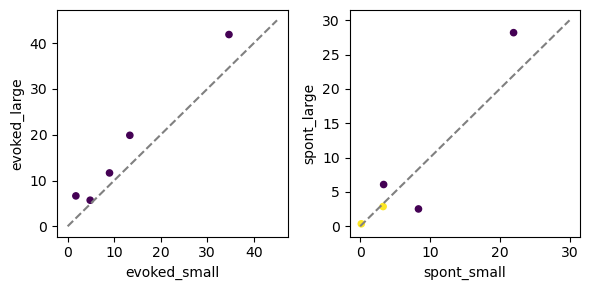

In [22]:
f,ax = plt.subplots(1,2, figsize=(6,3))
results.plot.scatter(x='evoked_small', y='evoked_large', c=results['evoked_p']>0.05, ax=ax[0])
results.plot.scatter(x='spont_small', y='spont_large', c=results['spont_p']>0.05, ax=ax[1])
ax[0].plot([0,45],[0,45],'--',color='gray')
ax[1].plot([0,30],[0,30],'--',color='gray')
plt.tight_layout()

In [15]:
results

,evoked_small,evoked_large,spont_small,spont_large,evoked_p,spont_p
eno052d-a1,1.772222,6.638889,0.166667,0.358333,0.009901,0.108911
eno052d-a2,4.844444,5.700000,3.291667,2.875000,0.029703,0.465347
eno052d-b1,34.672222,41.888889,21.983333,28.200000,0.009901,0.009901
eno052d-a1,1.772222,6.638889,0.166667,0.358333,0.009901,0.108911
eno052d-a2,4.844444,5.700000,3.291667,2.875000,0.029703,0.465347
